# MNIST handwritten digits


Zbióry zostały pobrane ze strony http://kaggle.com. Orginalne źródło http://yann.lecun.com/exdb/mnist/.

In [1]:
import swat
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from math import trunc
%matplotlib inline

In [2]:
cas = swat.CAS('localhost', 5570)

In [3]:
mnistZip = zipfile.ZipFile('../../dane/mnist.zip', 'r')
mnistTrainCSV = mnistZip.open('mnist-train.csv')
mnistTestCSV = mnistZip.open('mnist-test.csv')

In [4]:
cas.read_csv(mnistTrainCSV,casout='mnistTrain')
cas.read_csv(mnistTestCSV,casout='mnistTest')

NOTE: Cloud Analytic Services made the uploaded file available as table MNISTTRAIN in caslib CASUSER(fl0r3k).
NOTE: The table MNISTTRAIN has been created in caslib CASUSER(fl0r3k) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services made the uploaded file available as table MNISTTEST in caslib CASUSER(fl0r3k).
NOTE: The table MNISTTEST has been created in caslib CASUSER(fl0r3k) from binary data uploaded to Cloud Analytic Services.


CASTable('MNISTTEST', caslib='CASUSER(fl0r3k)')

In [5]:
cas.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier
0,MNISTTRAIN,42000,785,0,utf-8,03Apr2018:20:09:43,03Apr2018:20:09:43,03Apr2018:20:09:43,UTF8,1.838405e+09,1.838405e+09,1.838405e+09,0,0,0,,,0,fl0r3k,
1,MNISTTEST,28000,784,0,utf-8,03Apr2018:20:10:09,03Apr2018:20:10:09,03Apr2018:20:10:09,UTF8,1.838405e+09,1.838405e+09,1.838405e+09,0,0,0,,,0,fl0r3k,


In [6]:
train = cas.CASTable('mnisttrain')
test = cas.CASTable('mnisttest')

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
def show_digit(castable,row):
    raw_img = castable.fetch(from_=row,to=row).Fetch
    img = np.zeros((28, 28))
    for x in range(0, 27):
        for y in range(0, 27):
            img[x,y] = raw_img.loc[row-1][1+x*28+y]
    #plt.figure(figsize=(1.5, 1.5))
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.binary)
    print('label={}'.format(trunc(raw_img.loc[row-1][0])))
    plt.show()

label=8


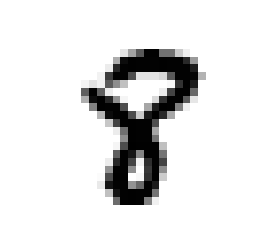

In [11]:
show_digit(train,1)

label=7


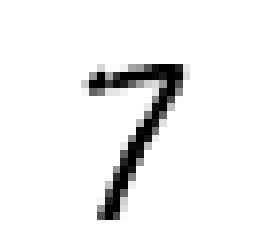

In [12]:
show_digit(train,3)

In [13]:
train.columninfo().ColumnInfo.Column.tolist()

['label',
 'pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pi

In [14]:
params = swat.vl()
params.table.name = 'mnisttrain'
params.target = 'label'
params.inputs = train.columninfo().ColumnInfo.Column[1:].tolist()
params.nominals = 'label'
params

{'inputs': ['pixel0',
  'pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'pixel53',
  'pixel54',
  'pixel55',
  'pixel56',
  'pixel57',
  'pixel58',
  'pixel59',
  'pixel60',
  'pixel61',
  'pixel62',
  'pixel63',
  'pixel64',
  'pixel65',
  'pixel66',
  'pixel67',
  'pixel68',
  'pixel69',
  'pixel70',
  'pixel71',
  'pixel72',
  'pixel73',
  'pixel74',
  'pixel75',
  'pixel76',

In [17]:
cas.loadActionSet('sampling')

NOTE: Added action set 'sampling'.


[actionset]

 'sampling'

+ Elapsed: 0.00121s, user: 0.0012s, sys: 3e-06s, mem: 0.2mb

In [22]:
train.sampling.srs(
    samppct = 70,
    partind = True,
    seed    = 1,
    output  = dict(casOut = dict(name='train', replace=True), copyVars = 'ALL')
)

NOTE: Using SEED=1 for sampling.


[outputSize]

 {'outputNObs': 42000.0, 'outputNVars': 786}

[SRSFreq]

 Frequencies
 
     NObs  NSamp
 0  42000  29400

[OutputCasTables]

             casLib   Name Label   Rows  Columns  \
 0  CASUSER(fl0r3k)  train        42000      786   
 
                                       casTable  
 0  CASTable('train', caslib='CASUSER(fl0r3k)')  

+ Elapsed: 0.258s, user: 1.34s, sys: 0.185s, mem: 39.3mb

# Drzewo decyzyjne

In [23]:
cas.loadactionset('decisionTree')

NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.00911s, sys: 0.00274s, mem: 0.227mb

In [24]:
cas.decisionTree.dtreeTrain(casOut = dict(name = 'dt_model', replace = True), **params )

,Descr,Value
0,Number of Tree Nodes,37.000000
1,Max Number of Branches,2.000000
2,Number of Levels,6.000000
3,Number of Leaves,19.000000
4,Number of Bins,20.000000
5,Minimum Size of Leaves,5.000000
6,Maximum Size of Leaves,38075.000000
7,Number of Variables,784.000000
8,Confidence Level for Pruning,0.250000
9,Number of Observations Used,42000.000000


# Gradient Boosting

In [25]:
cas.decisionTree.gbtreeTrain(casOut = dict(name = 'gbt_model', replace = True), **params)

,Descr,Value
0,Number of Trees,500.0
1,Distribution,3.0
2,Learning Rate,0.1
3,Subsampling Rate,0.5
4,Number of Selected Variables (M),784.0
5,Number of Bins,20.0
6,Number of Variables,784.0
7,Max Number of Tree Nodes,63.0
8,Min Number of Tree Nodes,39.0
9,Max Number of Branches,2.0


# Sieć neuronowa

In [26]:
cas.loadactionset('neuralNet')

NOTE: Added action set 'neuralNet'.


[actionset]

 'neuralNet'

+ Elapsed: 0.0159s, user: 0.00121s, sys: 0.00101s, mem: 0.213mb

In [27]:
cas.neuralNet.annTrain(casOut = dict(name = 'nn_model', replace = True), **params)

,Progress,Objective,Loss,FitError
0,1.0,23.142317,23.142317,0.915429
1,2.0,16.162621,16.162621,0.765762
2,3.0,7.674547,7.674547,0.433095
3,4.0,4.825819,4.825819,0.283429
4,5.0,3.461003,3.461003,0.196452
5,6.0,2.857884,2.857884,0.156286
6,7.0,2.597648,2.597648,0.141214
7,8.0,2.243397,2.243397,0.121952
8,9.0,1.974228,1.974228,0.109833
9,10.0,1.811814,1.811814,0.102000


# Skoring

In [28]:
cas.decisionTree.dtreeScore(table='mnisttrain', modelTable='dt_model', copyVars = ['label'], casOut = dict(name='dt_scored', replace = True))

[OutputCasTables]

             casLib       Name   Rows  Columns  \
 0  CASUSER(fl0r3k)  dt_scored  42000       13   
 
                                           casTable  
 0  CASTable('dt_scored', caslib='CASUSER(fl0r3k)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                             42000
 1  Number of Observations Used                             42000
 2  Misclassification Error (%)                       80.79047619

+ Elapsed: 0.0167s, user: 0.0487s, sys: 0.00299s, mem: 14.3mb

In [29]:
dt_scored = cas.CASTable('dt_scored')

In [30]:
dt_scored.fetch(to=100)

,label,_DT_PredName_,_DT_PredP_,_DT_PredLevel_,_LeafID_,_MissIt_,_NumNodes_,_NodeList0_,_NodeList1_,_NodeList2_,_NodeList3_,_NodeList4_,_NodeList5_
0,8.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
1,5.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
2,7.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
3,0.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
4,7.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
5,3.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
6,2.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
7,8.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
8,0.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0
9,0.0,1,0.122679,4.0,36.0,1.0,6.0,0.0,2.0,6.0,14.0,24.0,36.0


In [31]:
cas.decisionTree.gbTreeScore(table='mnisttrain', modelTable='gbt_model', copyVars = ['label'], casOut = dict(name='gbt_scored', replace = True))

[OutputCasTables]

             casLib        Name   Rows  Columns  \
 0  CASUSER(fl0r3k)  gbt_scored  42000        5   
 
                                            casTable  
 0  CASTable('gbt_scored', caslib='CASUSER(fl0r3k)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                             42000
 1  Number of Observations Used                             42000
 2  Misclassification Error (%)                      0.9738095238

[ErrorMetricInfo]

     TreeID  Trees  NLeaves       MCR   LogLoss       ASE      RASE     MAXAE
 0      0.0    1.0     27.0  0.177905  1.696124  0.072811  0.269834  0.932831
 1      1.0    2.0     59.0  0.131548  1.388338  0.060566  0.246101  0.942187
 2      2.0    3.0     91.0  0.113143  1.178393  0.050959  0.225742  0.945558
 3      3.0    4.0    121.0  0.101000  1.016869  0.043111  0.207631  0.953824
 4      4.0    5.0    153.0  0.091952  0.886228  0.036669  0.191491  0.960958
 5      5.0    6.0    182.0  0.084714  0.781921  0.031513  0.177520  0.967253
 6      6.0    7.0    214.0  0.080643  0.694972  0.027338  0.165342  0.973022
 7      7.0    8.0    245.0  0.076357  0.623036  0.023978  0.154848  0.977354
 8      8.0    9.0    277.0  0.071524  0.560542  0.021168  0.145492  0.981230
 9      9.0   10.0    309.0  0.067738  0.507486  0.018893  0.137450  0.984341
 10    10.0   11.0    337.0  0.064238  0.461991  0.017012  0.130431  0.985315
 11    11.0   12.0    369.0  0.061024  0.422957  0.015456  0.124323  0.987704
 12    12.0   13.0    401.0  0.058548  0.388028  0.014106  0.118768  0.989376
 13    13.0   14.0    433.0  0.055286  0.356788  0.012930  0.113709  0.991086
 14    14.0   15.0    465.0  0.053286  0.330659  0.011983  0.109467  0.992443
 15    15.0   16.0    497.0  0.050786  0.307759  0.011172  0.105700  0.991173
 16    16.0   17.0    527.0  0.048357  0.286730  0.010428  0.102120  0.991724
 17    17.0   18.0    557.0  0.045929  0.267098  0.009738  0.098681  0.992682
 18    18.0   19.0    589.0  0.044524  0.250673  0.009181  0.095816  0.991800
 19    19.0   20.0    621.0  0.042357  0.235218  0.008650  0.093005  0.991887
 20    20.0   21.0    653.0  0.040857  0.221698  0.008194  0.090523  0.993406
 21    21.0   22.0    685.0  0.039071  0.208869  0.007764  0.088116  0.992805
 22    22.0   23.0    716.0  0.038024  0.197473  0.007378  0.085896  0.992756
 23    23.0   24.0    746.0  0.035976  0.186444  0.007001  0.083675  0.993285
 24    24.0   25.0    777.0  0.034452  0.177202  0.006681  0.081736  0.993322
 25    25.0   26.0    807.0  0.033143  0.168491  0.006381  0.079880  0.993952
 26    26.0   27.0    838.0  0.031881  0.160829  0.006114  0.078195  0.997748
 27    27.0   28.0    869.0  0.031000  0.153492  0.005852  0.076495  0.997753
 28    28.0   29.0    899.0  0.029833  0.146645  0.005608  0.074890  0.993270
 29    29.0   30.0    931.0  0.028929  0.139925  0.005363  0.073229  0.991782
 30    30.0   31.0    962.0  0.027310  0.133921  0.005140  0.071692  0.991795
 31    31.0   32.0    994.0  0.026119  0.127291  0.004890  0.069932  0.991914
 32    32.0   33.0   1024.0  0.024929  0.121560  0.004672  0.068356  0.992261
 33    33.0   34.0   1055.0  0.023929  0.116598  0.004483  0.066959  0.992312
 34    34.0   35.0   1083.0  0.022690  0.111368  0.004275  0.065387  0.992859
 35    35.0   36.0   1114.0  0.020881  0.106083  0.004055  0.063676  0.992965
 36    36.0   37.0   1146.0  0.019810  0.102036  0.003890  0.062371  0.993589
 37    37.0   38.0   1178.0  0.019143  0.097688  0.003713  0.060934  0.994620
 38    38.0   39.0   1208.0  0.018048  0.093492  0.003543  0.059524  0.994023
 39    39.0   40.0   1240.0  0.017333  0.089734  0.003393  0.058248  0.994041
 40    40.0   41.0   1272.0  0.016524  0.086156  0.003246  0.056970  0.993612
 41    41.0   42.0   1304.0  0.015762  0.082583  0.003095  0.055633  0.993812
 42    42.0   43.0   1335.0  0.014905  0.079334  0.002956  0.054371  0.994134
 43    43.0   44.0   1364.0  0.013952

In [32]:
gbt_scored = cas.CASTable('gbt_scored')
gbt_scored.fetch(to=100)

,label,_GBT_PredName_,_GBT_PredP_,_GBT_PredLevel_,_MissIt_
0,8.0,8,0.998324,9.0,0.0
1,5.0,5,0.994538,0.0,0.0
2,7.0,7,0.989703,2.0,0.0
3,0.0,0,0.977313,5.0,0.0
4,7.0,7,0.981902,2.0,0.0
5,3.0,3,0.988517,6.0,0.0
6,2.0,2,0.957284,7.0,0.0
7,8.0,8,0.898539,9.0,0.0
8,0.0,0,0.996910,5.0,0.0
9,0.0,0,0.996409,5.0,0.0


In [33]:
cas.percentile.assess( table = dict(name = 'gbt_scored'), inputs = '_GBT_PredLevel_', response = 'label')

,Variable,Depth,Value,NObs,meanP,minP,MaxP,meanT,minT,MaxT
0,_GBT_PredLevel_,5.0,9.0,2100.0,9.000000,9.0,9.0,7.970458,0.0,9.0
1,_GBT_PredLevel_,10.0,8.0,2100.0,8.934286,8.0,9.0,8.032775,0.0,9.0
2,_GBT_PredLevel_,15.0,8.0,2100.0,8.000000,8.0,8.0,8.918757,1.0,9.0
3,_GBT_PredLevel_,20.0,7.0,2100.0,7.927143,7.0,8.0,8.417175,1.0,9.0
4,_GBT_PredLevel_,25.0,7.0,2100.0,7.000000,7.0,7.0,2.034293,1.0,9.0
5,_GBT_PredLevel_,30.0,6.0,2100.0,6.912857,6.0,7.0,2.120845,1.0,9.0
6,_GBT_PredLevel_,35.0,6.0,2100.0,6.000000,6.0,6.0,3.027521,1.0,9.0
7,_GBT_PredLevel_,40.0,5.0,2100.0,5.971905,5.0,6.0,2.943025,0.0,9.0
8,_GBT_PredLevel_,45.0,5.0,2100.0,5.000000,5.0,5.0,0.020034,0.0,9.0
9,_GBT_PredLevel_,50.0,4.0,2100.0,4.944762,4.0,5.0,0.076256,0.0,9.0


# Scikit

In [7]:
local = train.to_frame()

In [8]:
X_train = train.drop('label',axis=1)
y_train = train['label']

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y_train.head()

0    4.0
1    7.0
2    0.0
3    9.0
4    7.0
Name: label, dtype: float64

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import confusion_matrix, accuracy_score

In [14]:
gb = GradientBoostingClassifier()
gb.fit(X_train.values, y_train.values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [15]:
gb.predict_proba(X_train.values)[:,1]

array([9.20303351e-05, 1.49816952e-02, 2.06191651e-06, ...,
       3.16706998e-04, 5.79000789e-04, 2.18522577e-04])

In [16]:
df = pd.DataFrame(dict(actual = y_train.values, pred = gb.predict(X_train.values)))

In [17]:
df.head()

,actual,pred
0,4.0,4.0
1,7.0,7.0
2,0.0,0.0
3,9.0,9.0
4,7.0,7.0
